In [1]:
from crawling import * 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Phiên bản Vnstock 3.2.6 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnstock --upgrade`.
Lịch sử phiên bản: https://vnstocks.com/docs/tai-lieu/lich-su-phien-ban
Phiên bản hiện tại 3.2.3

Phiên bản Vnai 2.0.4 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnai --upgrade`.
Lịch sử phiên bản: https://pypi.org/project/vnai/#history
Phiên bản hiện tại 2.0.2

In [2]:
start_time = '2017-12-31'

end_time = '2025-03-01'

list_choice = 'VN30'

daily_full = VN_Stock_fully_data(start_time, end_time)

In [3]:
def VN_Stock_close_data(start_time,end_time, list_choice = 'VN30', interval = '1D', choice = 'close'):
    stock = Vnstock().stock(symbol='ACB', source='VCI')
    stock_list = stock.listing.symbols_by_group(list_choice)

    futures = pd.DataFrame()

    for ma_ck in stock_list:
        try:
            stock = Vnstock().stock(symbol= ma_ck, source='VCI')
            df = stock.quote.history(start= start_time, end= end_time, interval= interval)
            df = df.set_index('time')
            df = pd.DataFrame(df[choice])
            df.columns = [ma_ck]
            df.index = df.index.date
            futures = pd.concat([futures,df],axis = 1, join = 'outer').sort_index()
        except:
            continue

    if interval != '1D':
      futures['Date']= pd.to_datetime(futures.index, format='%Y-%m-%d')
    else:
      futures['Date'] = pd.to_datetime(futures.index, format='%Y-%m-%d %H:%M:%S')
    futures.set_index('Date', inplace=True)

    return futures


In [42]:
start_time = '2011-12-31'
# start_time = '2017-12-31'

end_time = '2025-03-01'

list_choice = 'VN30'

close_test = VN_Stock_close_data(start_time, end_time)
close_test

,ACB,BCM,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,2.66,NaN,NaN,31.30,6.26,4.78,NaN,NaN,NaN,0.66,...,NaN,NaN,4.75,28.54,NaN,16.43,NaN,12.93,NaN,NaN
2012-01-04,2.70,NaN,NaN,31.22,6.55,4.78,NaN,NaN,NaN,0.64,...,NaN,NaN,4.63,28.54,NaN,16.51,NaN,12.62,NaN,NaN
2012-01-05,2.76,NaN,NaN,29.76,6.52,4.69,NaN,NaN,NaN,0.62,...,NaN,NaN,4.61,28.54,NaN,15.76,NaN,12.16,NaN,NaN
2012-01-06,2.74,NaN,NaN,28.31,6.63,4.73,NaN,NaN,NaN,0.60,...,NaN,NaN,4.52,28.54,NaN,15.68,NaN,12.32,NaN,NaN
2012-01-09,2.73,NaN,NaN,26.92,6.66,4.74,NaN,NaN,NaN,0.60,...,NaN,NaN,4.66,28.54,NaN,16.43,NaN,12.39,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,21.85,74.5,41.10,58.70,41.90,139.31,68.6,32.45,23.45,23.08,...,26.50,15.89,62.54,40.25,20.01,40.60,96.6,61.62,19.03,17.35
2025-02-25,21.72,76.6,41.25,57.20,41.85,137.82,68.7,32.10,23.20,22.92,...,26.40,15.80,61.94,40.75,19.96,40.70,96.1,60.75,18.84,17.25
2025-02-26,21.68,76.4,41.20,57.80,41.35,140.59,68.4,32.60,23.05,23.12,...,26.30,15.80,61.74,40.70,19.82,41.00,97.1,60.94,18.74,17.15


In [36]:
volume_test = VN_Stock_close_data(start_time, end_time, choice='volume')
volume_test

,ACB,BCM,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,3657426.0,NaN,2903770,786420,3966440,5022160,1418300,NaN,NaN,4105100,...,NaN,NaN,2801720,NaN,57022.0,1435130,980460,372760,6973030,596280
2018-01-03,5056543.0,NaN,2458110,463220,3941230,2829930,755420,NaN,NaN,4828220,...,NaN,NaN,1843870,NaN,214767.0,5014340,1513290,557370,2393590,1663590
2018-01-04,6365641.0,NaN,4424190,428800,4995490,2784800,977010,NaN,NaN,4640280,...,NaN,NaN,1990040,NaN,238386.0,2937490,920310,704350,3127720,935370
2018-01-05,6453452.0,NaN,1908830,881940,3071940,2851450,829840,NaN,32205910.0,3660450,...,NaN,NaN,2045200,NaN,265531.0,2825160,873240,518860,2611280,1664520
2018-01-08,3879771.0,NaN,2053870,531590,5017740,2529030,730170,NaN,3321420.0,3702750,...,NaN,NaN,2071140,NaN,685881.0,3978990,736320,674800,2758530,1708070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,6403121.0,506700.0,4168600,901200,6764800,7522473,1066000,3295100.0,13634400.0,73928603,...,11762200.0,12874869.0,1957924,4771900.0,17458033.0,1540100,630800,11520294,22725922,7296500
2025-02-25,6482543.0,699600.0,4348800,529700,5728900,6832220,809600,2746800.0,12021400.0,31597535,...,14496400.0,15156834.0,1928951,5566600.0,12549590.0,1793300,590700,3891802,14020424,5837200
2025-02-26,5061653.0,391900.0,3020100,372300,9430900,3331505,519300,4286200.0,7301400.0,31840327,...,9946900.0,12931156.0,771099,4187200.0,8026437.0,1364900,476000,3639672,11214668,5280100


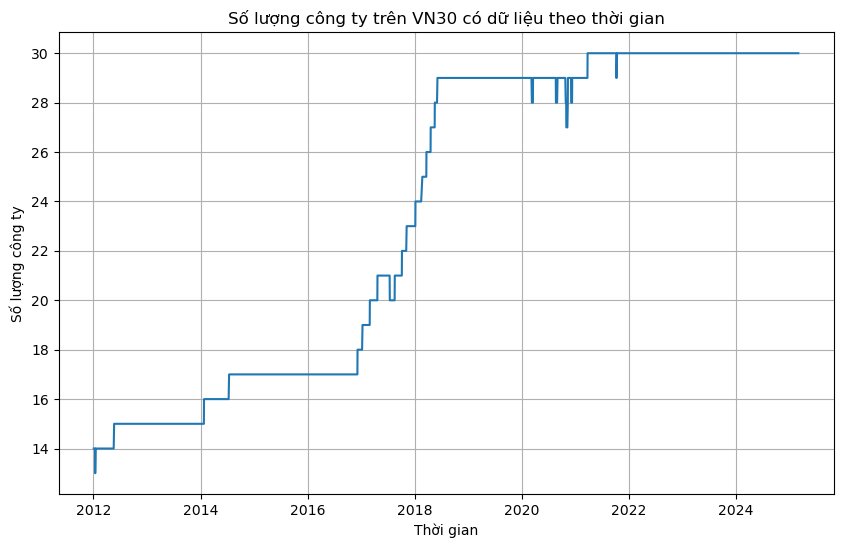

In [43]:
from matplotlib.ticker import MaxNLocator
fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(30 - close_test.isna().sum(axis = 1))
plt.title(f"Số lượng công ty trên {list_choice} có dữ liệu theo thời gian")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Thời gian")
plt.ylabel("Số lượng công ty")
plt.grid()
plt.show()

In [32]:
# returns = volume_test.pct_change().dropna()

# # Chuẩn hóa
# scaled = StandardScaler().fit_transform(returns.T)  # transpose để mỗi cổ phiếu là 1 sample

# # PCA
# pca = PCA(n_components=2)
# components = pca.fit_transform(scaled)  

# plt.figure(figsize=(10, 6))
# for i, symbol in enumerate(returns.columns):
#     plt.scatter(components[i, 0], components[i, 1])
#     plt.text(components[i, 0]+0.01, components[i, 1]+0.01, symbol)
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.title("PCA Plot của các cổ phiếu VN30")
# plt.grid()
# plt.show()

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.


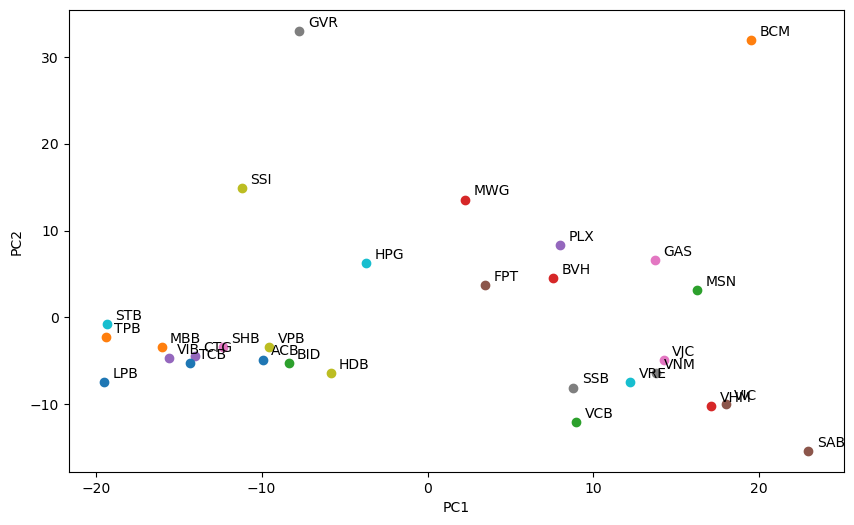

In [37]:
returns = close_test.pct_change().dropna()
vol_chg = volume_test.pct_change().dropna()

X_price = returns.T  # shape: (n_stock, n_day)
X_vol = vol_chg.T    # shape: (n_stock, n_day)

# Gộp lại
X_combined = pd.concat([X_price, X_vol], axis=1)

X_scaled = StandardScaler().fit_transform(X_combined)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
for i, stock in enumerate(X_combined.index):
    plt.scatter(components[i,0], components[i,1])
    plt.text(components[i,0]+0.5, components[i,1]+0.5, stock)
# plt.title("PCA tổng hợp giá và Khối lượng các công ty trong VN30")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [38]:
close_test

,ACB,BCM,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,6.81,NaN,14.90,57.74,16.65,18.17,57.64,NaN,NaN,9.04,...,NaN,NaN,23.41,NaN,3.50,57.44,118.84,105.37,8.73,37.54
2018-01-03,6.79,NaN,14.79,56.73,16.55,18.17,58.91,NaN,NaN,9.02,...,NaN,NaN,23.37,NaN,3.50,59.13,119.49,106.57,8.74,37.58
2018-01-04,6.81,NaN,15.20,57.32,17.15,18.54,61.69,NaN,NaN,9.13,...,NaN,NaN,23.58,NaN,3.53,59.50,119.97,107.02,9.06,37.42
2018-01-05,6.81,NaN,15.12,56.05,16.75,18.23,60.72,NaN,9.78,9.09,...,NaN,NaN,22.98,NaN,3.66,58.77,119.97,106.37,8.96,37.26
2018-01-08,7.04,NaN,15.37,57.07,17.15,18.51,60.72,NaN,9.81,9.38,...,NaN,NaN,23.58,NaN,3.86,58.99,119.65,104.63,9.37,36.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,21.85,74.5,41.10,58.70,41.90,139.31,68.60,32.45,23.45,23.08,...,26.50,15.89,62.54,40.25,20.01,40.60,96.60,61.62,19.03,17.35
2025-02-25,21.72,76.6,41.25,57.20,41.85,137.82,68.70,32.10,23.20,22.92,...,26.40,15.80,61.94,40.75,19.96,40.70,96.10,60.75,18.84,17.25
2025-02-26,21.68,76.4,41.20,57.80,41.35,140.59,68.40,32.60,23.05,23.12,...,26.30,15.80,61.74,40.70,19.82,41.00,97.10,60.94,18.74,17.15


In [39]:
def Volatility_scale(data, ignore_na=False, adjust = True, com = 60, min_periods=0):
    """Scale data using ex ante volatility"""

    # Lưu trữ index, tức thời gian 
    std_index = data.index

    # chứa kết quả
    daily_index = pd.DataFrame(index=std_index)

    # xét từng cổ phiếu
    for oo in data.columns:
        returns = data[oo]  # Lấy ra các return
        returns.dropna(inplace=True)  # xử lý null bằng zero

        returns = returns.rolling(2).apply(lambda x: x.iloc[1] / x.iloc[0] - 1)
        returns.iloc[0] =  0

        # Tính cumulative (cum) return , nhưng ko có thành phần - 1
        ret_index = (1 + returns).cumprod()

        # Tính daily volatility (vol)
        day_vol = returns.ewm(ignore_na=ignore_na,
                              adjust=adjust,
                              com=com,
                              min_periods=min_periods).std(bias=False)
        
        vol = day_vol * np.sqrt(252)  # scale lại theo 252 ngày active trading

        # Join cum return và vol
        ret_index = pd.concat([ret_index, vol], axis=1)
        ret_index.columns = [oo, oo + '_Vol']  # Đặt tên cột cum return là tên cổ phiếu, bên cạnh là vol 

        # Join 
        daily_index = pd.concat([daily_index, ret_index], join = 'outer' ,axis=1)

    return daily_index


In [40]:
daily_index = Volatility_scale(close_test)

invalid value encountered in accumulate


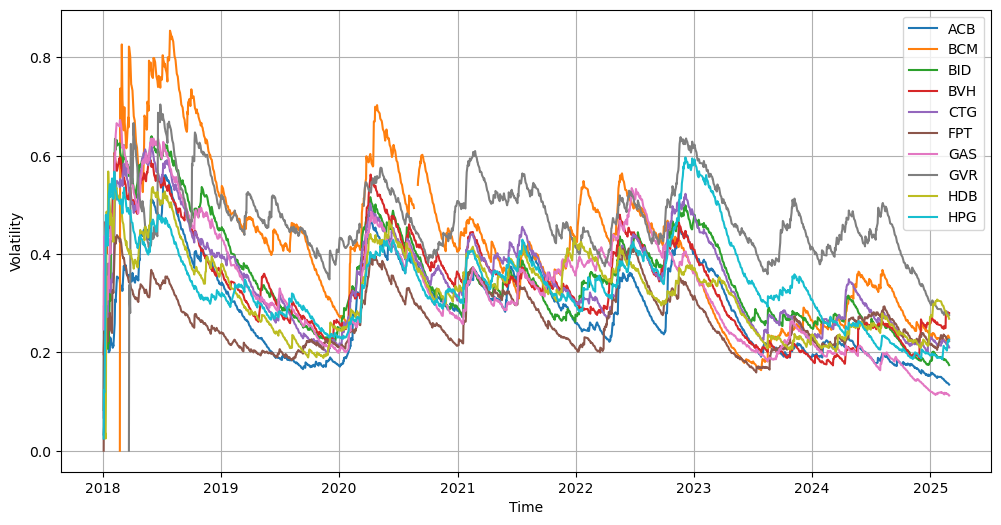

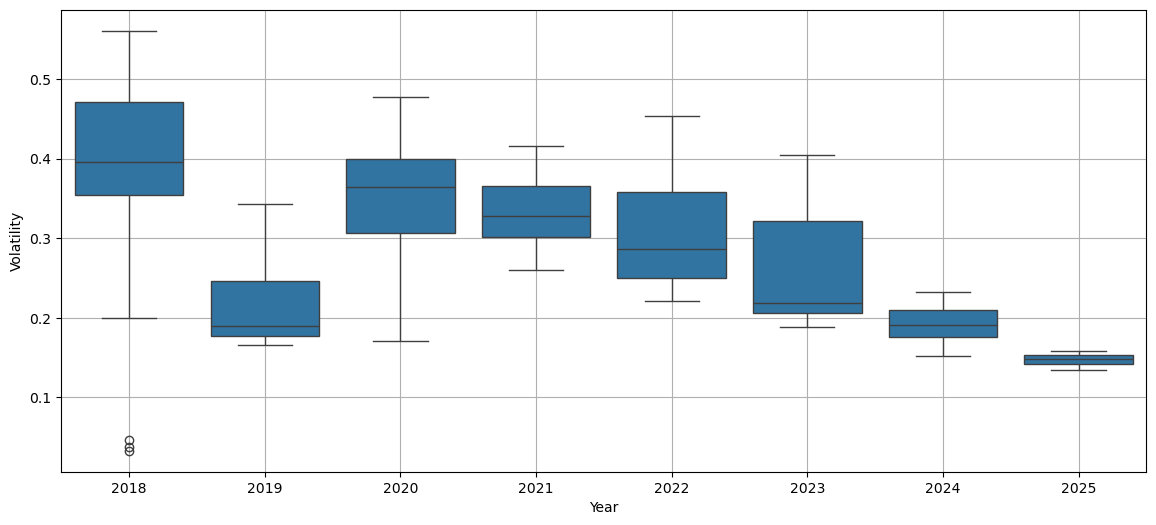

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ biến động qua thời gian
plt.figure(figsize=(12, 6))
for col in daily_index.filter(like='_Vol').columns[:10]:  # Chọn 10 cổ phiếu đầu tiên
    plt.plot(daily_index.index, daily_index[col], label=col.replace('_Vol', ''))
# plt.title('Biến động (Volatility) qua thời gian')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Boxplot biến động theo từng năm
daily_index['Year'] = daily_index.index.year
plt.figure(figsize=(14, 6))
sns.boxplot(data=daily_index, x='Year', y=daily_index.filter(like='_Vol').iloc[:, 0])
# plt.title('Boxplot biến động hàng năm (Volatility)')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()